In [3]:
### Load pore structure and LB simulation data


import warnings
import scipy as sp
import numpy as np
import porespy as ps
import openpnm as op
import matplotlib.pyplot as plt
import pickle
import scipy.io as sio
import pandas as pd
import seaborn as sns
import  math

imageSize = 250

bigGrainImage = np.load('subBeadPackPy250_justSpheres.npy')
poreImage = np.load('finalSimFile3D_out.npy')
#poreImage = poreImage[0:imageSize, 0:imageSize, 0:250]

velMat = sio.loadmat('velNormOut.mat')
velDataNorm = velMat['velNorm']
# with open('velNorm.pkl', 'rb') as fin :
#     velNorm = pickle.load(fin)

resolution = 16.81E-6 # adding resolution in meters
#poreVelocity = np.reshape(poreVelocity, (imageSize, imageSize, imageSize))




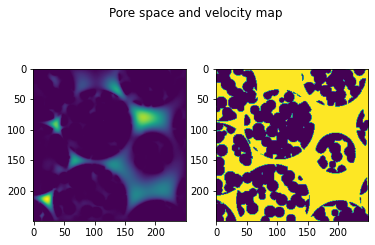

In [4]:
slice = 49

poreImage = np.transpose(poreImage)
bigGrainImage = np.transpose(bigGrainImage)

fig, (p1, p2) = plt.subplots(1, 2)

fig.suptitle('Pore space and velocity map')
p1.imshow(velDataNorm[:,:,slice])
p2.imshow(poreImage[:,:,slice])



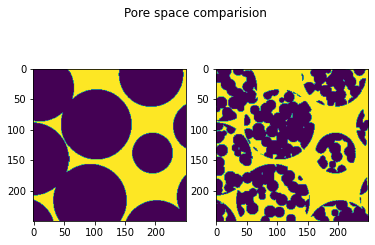

In [5]:
slice = 49

fig, (p1, p2) = plt.subplots(1, 2)

fig.suptitle('Pore space comparision')
p1.imshow(bigGrainImage[:,:,slice])
p2.imshow(poreImage[:,:,slice])



In [25]:
ps.io.to_vtk(velDataNorm,'velVTKOut')
ps.io.to_vtk(poreImage,'poreStructureOut')

In [6]:
snowFilt = ps.filters.snow_partitioning(im=poreImage, return_all=True)



------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  1548
Peaks after trimming saddle points:  1005
Peaks after trimming nearby peaks:  983


In [7]:
poreInfo = ps.networks.regions_to_network(snowFilt.regions, dt=snowFilt.dt)

------------------------------------------------------------
Extracting pore and throat information from image
100%|██████████| 983/983 [00:10<00:00, 94.06it/s] 


In [8]:
snowFiltBigGrain = ps.filters.snow_partitioning(im=bigGrainImage, return_all=True)
poreInfoBigGrain = ps.networks.regions_to_network(snowFiltBigGrain.regions, dt=snowFiltBigGrain.dt)


------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  135
Peaks after trimming saddle points:  119
Peaks after trimming nearby peaks:  107
------------------------------------------------------------
Extracting pore and throat information from image
100%|██████████| 107/107 [00:05<00:00, 19.94it/s]


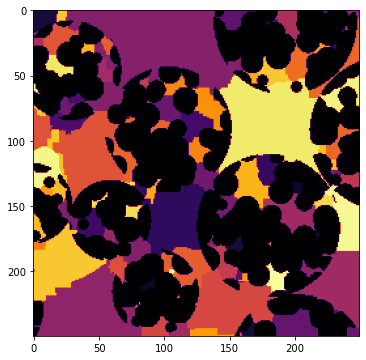

In [17]:
slice = 100
plt.subplots(1, 1, figsize=(6, 6))
fig = plt.imshow(snowFilt.regions[0:imageSize, 0:imageSize, slice], cmap=plt.cm.inferno)

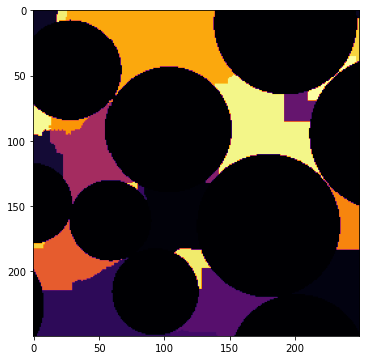

In [19]:
plt.subplots(1, 1, figsize=(6, 6))
fig = plt.imshow(snowFiltBigGrain.regions[0:imageSize, 0:imageSize, slice], cmap=plt.cm.inferno)

In [7]:
snowFilt.regions[0:imageSize, 0:imageSize, slice]

array([[895, 895, 895, ..., 854, 854, 854],
       [895, 895, 895, ..., 854, 854, 854],
       [895, 895, 895, ..., 854, 854, 854],
       ...,
       [914, 914, 914, ...,   0,   0,   0],
       [914, 914, 914, ...,   0,   0,   0],
       [914, 914, 914, ...,   0,   0, 291]])

In [9]:

cubeSize = len(poreImage)

velocitiesPore = {}

regionMap = snowFilt.regions

for a in range(0, cubeSize):
    for b in range(0, cubeSize):
        for c in range(0, cubeSize):

            #print(beadPack[a,b,c])

            key = str(regionMap[a,b,c])
            if key != '0.0':
                if key in velocitiesPore:
                    velocitiesPore[key].append(velDataNorm[a,b,c])
                else:
                    velocitiesPore.setdefault(key,[])
                    velocitiesPore[key].append(velDataNorm[a,b,c])


In [ ]:
# TODO
# Need to figure out how to do this for throats see porespy Q/A, no velocity in pores?
# Think about region map, this is pores not throats right?

# cubeSize = len(poreImage)
#
# velocitiesThroat = {}
#
# regionMap = snowFilt.regions
#
# for a in range(0, cubeSize):
#     for b in range(0, cubeSize):
#         for c in range(0, cubeSize):
#
#             #print(beadPack[a,b,c])
#
#             key = str(regionMap[a,b,c])
#             if key != '0.0':
#                 if key in velocitiesThroat:
#                     velocitiesThroat[key].append(velDataNorm[a,b,c])
#                 else:
#                     velocitiesThroat.setdefault(key,[])
#                     velocitiesThroat[key].append(velDataNorm[a,b,c])


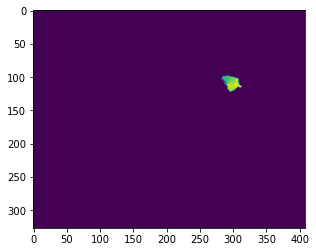

In [21]:
#regionMap[0,:,4]
# pull out individual pore for plotting, after labelling has occurred
testIM = np.where(snowFilt.regions == 1,False, True)
test = ps.visualization.show_3D(testIM)
plt.imshow(test)
ps.io.to_vtk(testIM,'pulledOutPore.vtk')

In [14]:
# look up number of regions with secondary porosity
print(f"Number of regions: {np.unique(snowFilt.regions).size}")

Number of regions: 983


In [15]:
# look up number of regions with just primary porosity
print(f"Number of regions: {np.unique(snowFiltBigGrain.regions).size}")



Number of regions: 108


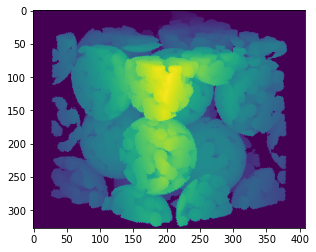

In [11]:
# visualize the entire pore space for reference
test = ps.visualization.show_3D(poreImage)
plt.imshow(test)

In [18]:
# velocity data does not work in this way
# test = ps.visualization.show_3D(velDataNorm)
# plt.imshow(test)

(array([158., 144., 106., 107.,  92.,  76.,  71.,  41.,  35.,  36.,  23.,
          7.,   4.,   7.,   4.,   4.,   5.,   2.,   5.,   2.]),
 array([1.45680000e-16, 2.54090001e-08, 5.08180001e-08, 7.62270001e-08,
        1.01636000e-07, 1.27045000e-07, 1.52454000e-07, 1.77863000e-07,
        2.03272000e-07, 2.28681000e-07, 2.54090000e-07, 2.79499000e-07,
        3.04908000e-07, 3.30317000e-07, 3.55726000e-07, 3.81135000e-07,
        4.06544000e-07, 4.31953000e-07, 4.57362000e-07, 4.82771000e-07,
        5.08180000e-07]),
 <a list of 20 Patch objects>)

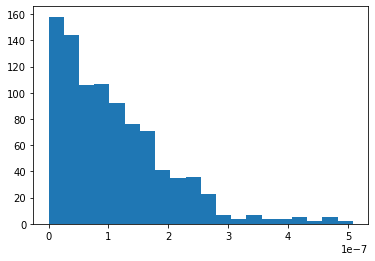

In [10]:
# Plot histogram of pore velocities
poreLabel = '2'
poreVelNorm = velocitiesPore.get(poreLabel)

n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
# We can set the number of bins with the `bins` kwarg
plt.hist(poreVelNorm, bins=n_bins)

(array([ 86., 246., 214., 149., 130.,  69.,  24.,   8.,   5.,   0.,   7.,
         17.,   9.,   5.,   3.,   4.,   2.,   0.,   1.,   3.]),
 array([4.50422592e-06, 4.48818325e-05, 8.52594391e-05, 1.25637046e-04,
        1.66014652e-04, 2.06392259e-04, 2.46769865e-04, 2.87147472e-04,
        3.27525078e-04, 3.67902685e-04, 4.08280292e-04, 4.48657898e-04,
        4.89035505e-04, 5.29413111e-04, 5.69790718e-04, 6.10168324e-04,
        6.50545931e-04, 6.90923537e-04, 7.31301144e-04, 7.71678751e-04,
        8.12056357e-04]),
 <a list of 20 Patch objects>)

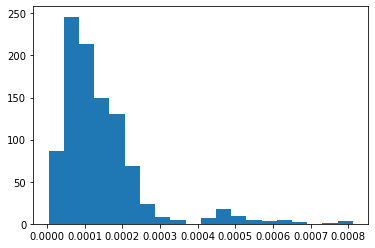

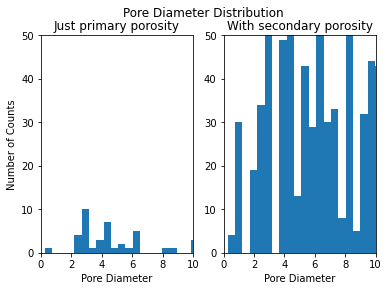

In [11]:
# for secondary porosity image
# Plot histogram of pore diameters

poreDiamSecondary = poreInfo['pore.diameter']

#try to convert to normal units
#poreDiamSecondary = poreDiamSecondary * (resolution)

# for just large grain image
# Plot histogram of pore diameters

poreDiamBig = poreInfoBigGrain['pore.diameter']

#try to convert to normal units
#poreDiamBig= poreDiamBig * (resolution)


n_bins = 100
xlimMax = 10

fig = plt.figure()
plt.suptitle('Pore Diameter Distribution')

ax2 = fig.add_subplot(1,2,2)#
ax2.hist(poreDiamSecondary, bins=n_bins)
ax2.set_title('With secondary porosity')
ax2.set_xlim([0, xlimMax])
ax2.set_ylim([0, 50])
#ax1.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
ax2.set_xlabel('Pore Diameter')
#ax2.set_ylabel('Number of Counts')

ax1 = fig.add_subplot(1,2,1)
ax1.hist(poreDiamBig, bins=n_bins)
ax1.set_title('Just primary porosity')
ax1.set_ylim([0, 50])
#ax2.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
ax1.set_xlim([0, xlimMax])
ax1.set_xlabel('Pore Diameter')
ax1.set_ylabel('Number of Counts')

plt.savefig('poreDiamDist.png')


In [ ]:
nRegions = np.unique(snowFilt.regions).size
poreDiamVec = np.zeros(nRegions,)
velNormPoreVec = np.zeros(nRegions,)
velAllPoreVec = []

for a in range(0, poreInfo['pore.diameter'].size):
    poreDiamVec[a] = poreInfo['pore.diameter'][a]
    velNormPoreVec[a] = np.median(velocitiesPore.get(str(a)))
    test = [velocitiesPore.get(str(a))]
    velAllPoreVec.append([velocitiesPore.get(str(a))])

#Append one more time for indexing
velAllPoreVec.append([0])

# Current problem is that the velocities dictionary doesn't have a value for label 53 for some reason
# this causes problems here! Fix!
plt.scatter(poreDiamVec,velNormPoreVec)

In [ ]:
# try to estimate displacement distribution
# NEED TO FIGURE OUT UNITS!!!!
nRegions = np.unique(snowFilt.regions).size
bigDelta = 90E-03 # time for spins to move in seconds, current setting is 90ms
poreDispVector = np.zeros(nRegions)
allPoreDispVector =  []

for a in range(0, nRegions):
    poreDispVector[a] = velNormPoreVec[a]*bigDelta
    multArray = np.array(velAllPoreVec[a])*bigDelta
    allPoreDispVector.extend(multArray)

sns.distplot(poreDispVector, hist=True, kde=True,
             bins=int(40), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
# Bin pore diameter data
#max(poreInfo['pore.diameter'])
#min(poreInfo['pore.diameter'])

poreBins = np.linspace(0.1,60,n_bins)
poreDiamVec = poreInfo['pore.diameter']
binnedInd = np.digitize(poreDiamVec, poreBins)

allKeys = np.round(poreBins,2)
binnedPoreDiam = dict.fromkeys(allKeys)

for i in binnedPoreDiam.keys():
    binnedPoreDiam[i] = []

# currently storing all of the diameters of a pore for a binned pore size
for i in range(1, len(binnedInd)):
    key=poreBins[binnedInd[i]]
    key = round(key,2)
    binnedPoreDiam[key].append(poreDiamVec[i])
    #binnedPoreDiam[key].append(poreDispVector[i])
#regionLabel[i].append

In [ ]:
####################################################
# Bin Velocity data
nVelBins = 100
velBins = np.logspace(-9,-4,nVelBins)
binnedInd = np.digitize(velNormPoreVec, velBins)
velBinsLin = np.exp(velBins);

allKeys = velBins
binnedPoreVelNorm = dict.fromkeys(allKeys)

for i in binnedPoreVelNorm.keys():
    binnedPoreVelNorm[i] = []

 # currently storing all of the velocities in a pore of a given diameter
for i in range(1, len(binnedInd)):
    key=velBins[binnedInd[i]]
    binnedPoreVelNorm[key].append(velNormPoreVec[i])


#resampledVel = sp.resample(velNormPoreVec,nVelBins,velBins)

In [ ]:
poreBins = np.linspace(0.1,60,n_bins-1)
poreDiamVec = poreInfo['pore.diameter']
binnedInd = np.digitize(poreDiamVec, poreBins)
velBins = np.logspace(-9,-4,nVelBins+1)

allKeys = np.round(poreBins,2)
binnedPoreDispAtDiam = dict.fromkeys(allKeys)

for i in binnedPoreDispAtDiam.keys():
    binnedPoreDispAtDiam[i] = []

# currently storing all of the diameters of a pore for a binned pore size
for i in range(1, len(binnedInd)):
    key=poreBins[binnedInd[i]]
    key = round(key,2)
    i =3
    test = allPoreDispVector[i]
    binnedPoreDispAtDiam[key].extend(allPoreDispVector[i])
#regionLabel[i].append

imageMap = np.zeros([n_bins, nVelBins])
keyList = list(binnedPoreDispAtDiam.keys())
for i in range(1,len(keyList)):
    key=keyList[i]
    temp = np.histogram(binnedPoreDispAtDiam[key],velBins,density='True')
    temp2 = temp[0][:]
    temp2[:] = [0 if math.isnan(ele) else ele for ele in temp2]
    imageMap[i,:] =  temp2

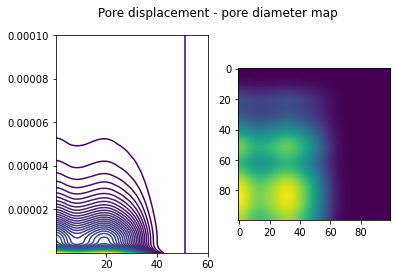

In [100]:
poreBins = np.linspace(0.1,60,n_bins)
velBins = np.logspace(-9,-4,nVelBins)

filtMap = sp.ndimage.gaussian_filter(imageMap, 6)
levels = np.linspace(filtMap.min(),filtMap.max(),100)
#levels = np.flipud(levels)
# This should be an intensity plot of pore diameter and displacement
fig2 = plt.figure()
plt.suptitle('Pore displacement - pore diameter map')

ax1 = fig2.add_subplot(1,2,2)
filtMapFlip = np.flipud(filtMap)
ax1.imshow(filtMapFlip)

#xi = np.linspace(-2.1,2.1,100)
#yi = np.linspace(-2.1,2.1,100)
#zi = sp.interpolate.griddata((velBins, poreBins), filtMap, (xi[None,:], yi[:,None]), method='cubic')

ax2 = fig2.add_subplot(1,2,1)
ax2.contour(poreBins,velBins,filtMap,levels)
#plt.contourf(xi,yi,zi)

In [56]:
len(binnedInd)-1

982

(array([129., 181., 175., 152., 119.,  91.,  48.,  27.,   8.,   1.,   2.,
         11.,  14.,   8.,   5.,   4.,   3.,   1.,   3.,   1.]),
 array([11.20666667, 15.32470657, 19.44274647, 23.56078638, 27.67882628,
        31.79686619, 35.91490609, 40.03294599, 44.1509859 , 48.2690258 ,
        52.38706571, 56.50510561, 60.62314551, 64.74118542, 68.85922532,
        72.97726523, 77.09530513, 81.21334503, 85.33138494, 89.44942484,
        93.56746475]),
 <a list of 20 Patch objects>)

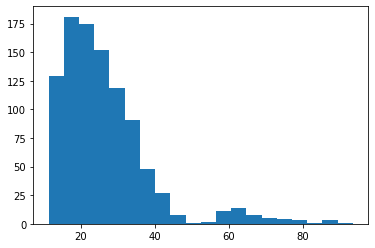

In [25]:
# try to estimate T2 from computational data
# rho = 1.5um/s from Borgia et al. 1995 (see statement below)
#  This result is in good agreement with the measurements on an ultraclean quartz sand
# pack that give r'1.5 mm/s, which is midway between our
# minimum r and the mean r value shown for the present data
# in Table I for initial rate computation.

rho = 1.5E-6

invT2 = rho * (poreInfo['pore.surface_area']/poreInfo['pore.volume']) * (1/16.81E-6)
T2_est = 1/invT2

plt.hist(T2_est, bins=20)


In [17]:
a
velocities.get(str(a))

[1.9745e-06,
 8.7739e-07,
 4.6702e-07,
 8.7696e-07,
 1.4678e-06,
 2.181e-06,
 1.7757e-06,
 3.3497e-06,
 2.8623e-06,
 1.6027e-06,
 3.2771e-06,
 9.2571e-07,
 2.1774e-06,
 7.1714e-07,
 1.17e-06,
 6.5664e-07,
 7.1978e-07,
 9.8524e-07,
 1.6608e-06,
 1.1293e-06,
 2.2094e-06,
 2.1712e-06,
 1.7384e-06,
 7.1811e-07,
 1.44e-06,
 2.3628e-06,
 2.8639e-06,
 2.652e-06,
 2.0638e-06,
 7.3495e-07,
 1.7252e-06,
 3.3416e-06,
 3.0209e-06,
 1.9101e-06,
 1.492e-06,
 2.9909e-06,
 2.0153e-06,
 1.911e-06,
 1.3027e-06,
 9.3106e-07,
 9.5533e-07,
 5.112e-07,
 5.3469e-07,
 1.2808e-07,
 2.0565e-07,
 3.6144e-07,
 1.9795e-06,
 5.8506e-07,
 3.3186e-07,
 5.2007e-08,
 8.5185e-07,
 1.3535e-06,
 1.6875e-06,
 2.0186e-06,
 3.1179e-06,
 3.265e-06,
 2.7354e-06,
 4.5071e-07,
 5.2883e-07,
 1.0357e-06,
 1.6501e-06,
 2.2481e-06,
 3.1248e-06,
 3.6184e-06,
 3.6093e-06,
 2.7395e-06,
 1.234e-06,
 1.2112e-06,
 2.2163e-06,
 3.3535e-06,
 3.8252e-06,
 3.5984e-06,
 2.24e-06,
 1.9411e-06,
 3.6085e-06,
 3.6421e-06,
 2.2978e-06,
 1.5703e-06,

983